In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import plotly.graph_objects as go 

import warnings
warnings.filterwarnings('ignore') 

#####################kaggle review ###############

In [2]:
df = pd.read_csv('./Student Mental health.csv') 

In [3]:
df.head() 

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [4]:
def columns_info(df): # pandas DataFrame df의 각 열에 대한 다양한 통계 정보를 수집하여 DataFrame으로 반환하는 역활
    info = []
    for col in df.columns:
        data_type = df[col].dtype # 각 열의 데이터타입
        count = len(df[col])      # 값의 개수
        nan_count = df[col].isnull().sum()  # NaN값의 개수 비율 
        nan_percent = (nan_count / count) * 100 if count > 0 else 0
        unique_count = df[col].nunique() 

        if pd.api.types.is_numeric_dtype(df[col]):  # 열의 숫자형 확인후, 숫자형인 경우 최대값, 최소값 계산
            max_value = df[col].max()
            min_value = df[col].min()
            sample_value = df[col].dropna().sample().iloc[0] if count - nan_count > 0 else None

            # 숫자형이 아닌 경우 샘플 값만 추출하고 최대값, 최소값을 NO value로 선정 
        else:
            sample_value = df[col].dropna().sample().iloc[0] if count - nan_count > 0 else None
            max_value = 'no value'
            min_value = 'no value'

            info.append({    # 각열에 대한 정보를 -> 딕셔너리로 만들어 리스트에 추가 --> append 
            'Column_name': col,
            'Data_Type': data_type,
            'Count': count,
            'NaN_Count': nan_count,
            'NaN_Percent': nan_percent,
            'Unique_Count': unique_count,
            'Max_Value': max_value,
            'Min_Value': min_value,
            'Sample_Value': sample_value
        })
            return pd.DataFrame(info) # list -> dataframe으로 변환 

In [5]:
columns_info(df)

,Column_name,Data_Type,Count,NaN_Count,NaN_Percent,Unique_Count,Max_Value,Min_Value,Sample_Value
0,Timestamp,object,101,0,0.0,92,no value,no value,13/07/2020 14:38:12


In [6]:
df.columns = ['Timestamp', 'Gender', 'Age', 'Course',
       'Year of Study', 'CGPA', 'Marital status',
       'Depression', 'Anxiety',
       'Panic attack',
       'Treatment']

In [7]:
df["Age"].value_counts()

Age
18.0    32
24.0    23
19.0    21
23.0    13
20.0     6
21.0     3
22.0     2
Name: count, dtype: int64

In [8]:
df['Age'].isnull().sum() 

1

In [9]:
df["Age"] = df["Age"].fillna(df["Age"].mode()[0]) 

In [10]:
df["Age"].isnull().sum() 

0

In [11]:
fig = px.pie(df, names='Age', title='Age Distribution')
fig.update_layout(legend_title_text='Age')
fig.show() 
# 나이 18세 가장 many 

In [12]:
df["Gender"].value_counts() 
# 남성, 여성 추출 

Gender
Female    75
Male      26
Name: count, dtype: int64

In [13]:
fig = px.pie(df, names="Gender", title="Gender Distribution")
fig.update_layout(legend_title_text="Gender") 
fig.show() 
# 성별구별 
# 남성 25.7%, 여성 74.3% 

In [14]:
# Year of study 
df ["Year of Study"].value_counts() 


Year of Study
year 1    41
Year 3    19
Year 2    16
year 2    10
year 4     8
year 3     5
Year 1     2
Name: count, dtype: int64

In [15]:
df["Year of Study"] = df["Year of Study"].replace(
    ["Year 1","year 1", "Year 2","year 2","Year 3","year 3","year 4"],
    [1,1,2,2,3,3,4]
)

In [16]:
df["Year of Study"].value_counts() 
# 공부한 해 

Year of Study
1    43
2    26
3    24
4     8
Name: count, dtype: int64

In [17]:
fig = px.pie(df, names = "Year of Study", title="Year Distribution")
fig.update_layout(legend_title_text = "Years")
fig.show() 
# 1년동안 공부한 학생이 가장 많이 분포 
# 2 -> 3 -> 4 

In [18]:
df["CGPA"].value_counts().sort_values() 

CGPA
3.50 - 4.00      1
2.00 - 2.49      2
2.50 - 2.99      4
0 - 1.99         4
3.00 - 3.49     43
3.50 - 4.00     47
Name: count, dtype: int64

In [19]:
df['CGPA'].nunique() 

6

In [20]:
df['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [21]:
data = {"CGPA_values": ["3.50 - 4.00", "3.00-3.49", "2.50-2.99", "0-1.99","2.00-2.49"],
        "CGPA_counts": [48,43,4,4,2]}   

fig = px.bar(data, x = "CGPA_values", y = "CGPA_counts", title = "CGPA Distribution")
fig.update_layout(legend_title_text = "CGPA")
fig.show() 
# CGPA Distribution -> 3.50 ~ 4.0 비율 many 

In [22]:
df["Marital status"].value_counts()
# 결혼 하지 않은사람:85, 한사람:16 

Marital status
No     85
Yes    16
Name: count, dtype: int64

In [23]:
plt = px.pie(df, names='Marital status', title='Marital Status Distribution')
plt.update_annotations(textposition='outside')
plt.update_layout(legend_title_text='Marital Status')
plt.show()

In [25]:
# dataframe
grouped = df.groupby("Gender")["Marital status"].value_counts()

df1 = pd.DataFrame(grouped) 
df1 

count
Gender Marital status       
Female No                 62
       Yes                13
Male   No                 23
       Yes                 3

Text(0, 0.5, 'Percentage')

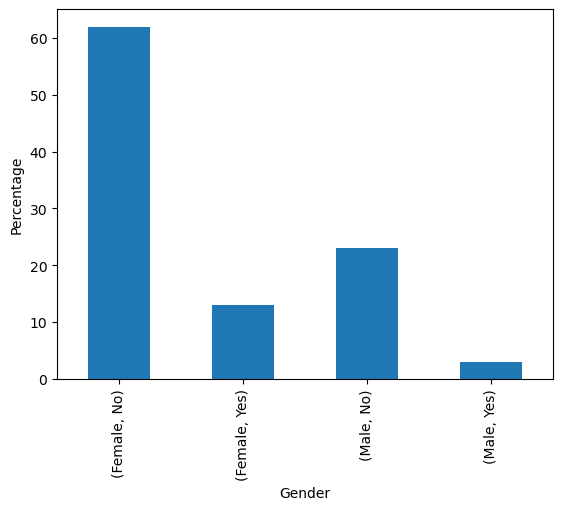

In [26]:
ax = grouped.plot(kind='bar')

ax.set_xlabel('Gender')
ax.set_ylabel('Percentage')
# 결혼을 하지않은 여성에 값 max 
# 결혼을 한 남성 비율 min 

In [27]:
# df2 dataframe 
df2 = pd.concat([df['Gender'], df['Marital status']], axis=1).reset_index(drop=True) 

In [28]:
df.head() 

,Timestamp,Gender,Age,Course,Year of Study,CGPA,Marital status,Depression,Anxiety,Panic attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No


In [29]:
df2.columns
# Gender, Marital status 생성 

Index(['Gender', 'Marital status'], dtype='object')

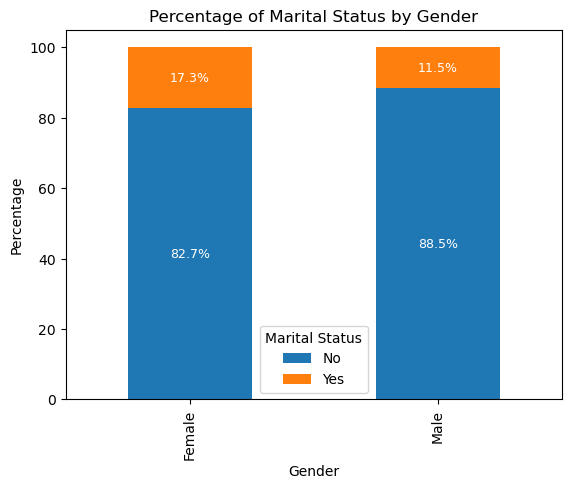

In [35]:
grouped = df2.groupby('Gender')['Marital status'].value_counts(normalize=True) * 100 # 데이터 그룹화 및 백분율 계산 
grouped = grouped.unstack()

ax = grouped.plot(kind='bar', stacked=True)  # 그래프 생성 

# 각 막대 위에 백분율 표시 
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=9, color='white')

# 그래프 설정 
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Marital Status by Gender')
ax.legend(title='Marital Status')

# 그래프 표시 
plt.show()

# 성별과 결혼여부를 그룹화 하여 백분율(%)로 나타냈을 때 결혼을 하지 않은 사람이 84.2% 추출 
# 막대 그래프로 나타냈을 때에 값은 결혼을 하지않았을 때 82.7% (여성), 결혼을 했을 때 17.3%(여성)에 값을 추출 할 수 있다 
# 반대로 남성에 비율은 88.5%, 11.5%에 비율로 값을 추출 review 된다. 


In [36]:
# 강의 counts
df["Course"] = df["Course"].str.lower().str.strip() 

In [37]:
df["Course"].nunique
# 1 ~ 100 

<bound method IndexOpsMixin.nunique of 0             engineering
1       islamic education
2                     bit
3                    laws
4            mathemathics
              ...        
96                    bcs
97            engineering
98                nursing
99       pendidikan islam
100    biomedical science
Name: Course, Length: 101, dtype: object>

In [38]:
plt = px.histogram(df, x = "Course", title="Course Distribution")
plt.show() 
# 강의배포 histogram 


In [39]:
# 우울증 
df["Depression"].value_counts() 

Depression
No     66
Yes    35
Name: count, dtype: int64

In [42]:
df.groupby("Depression")["Gender"].value_counts() 
# Depression 그룹화 
# 여성, 남성 비율 /

Depression  Gender
No          Female    46
            Male      20
Yes         Female    29
            Male       6
Name: count, dtype: int64

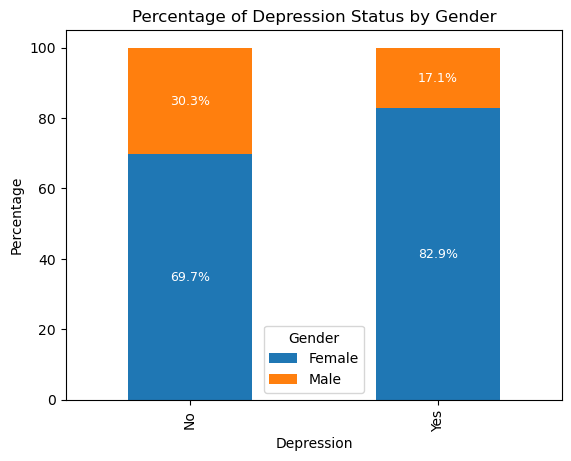

In [48]:
grouped = df.groupby("Depression")["Gender"].value_counts(normalize=True) * 100
grouped = grouped.unstack()


ax = grouped.plot(kind='bar', stacked=True)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=9, color='white')


ax.set_xlabel("Depression")
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Depression Status by Gender')
ax.legend(title="Gender")
# 우울증이 없는 여성에 비율이 69.7%, 남성에 비율이 30.3% 으로 나타낸다.
# 우을중이 있는 여성에 경우 82.9%로 높은값이 나타났고 남성에 경우 17.1%에 비율로 나타났다. 

In [49]:
df.groupby("Depression")["CGPA"].value_counts()
# Depression 에대한 CGPA
# 우울증이 없는 학생에 성적 등급은 3.50 ~ 4.00 받은 학생수가 max
# 반면 우울증이 있는 성적 등급 3.00 ~ 3.49 받은 학생수는 max  

Depression  CGPA        
No          3.50 - 4.00     35
            3.00 - 3.49     24
            0 - 1.99         4
            2.00 - 2.49      2
            2.50 - 2.99      1
Yes         3.00 - 3.49     19
            3.50 - 4.00     12
            2.50 - 2.99      3
            3.50 - 4.00      1
Name: count, dtype: int64

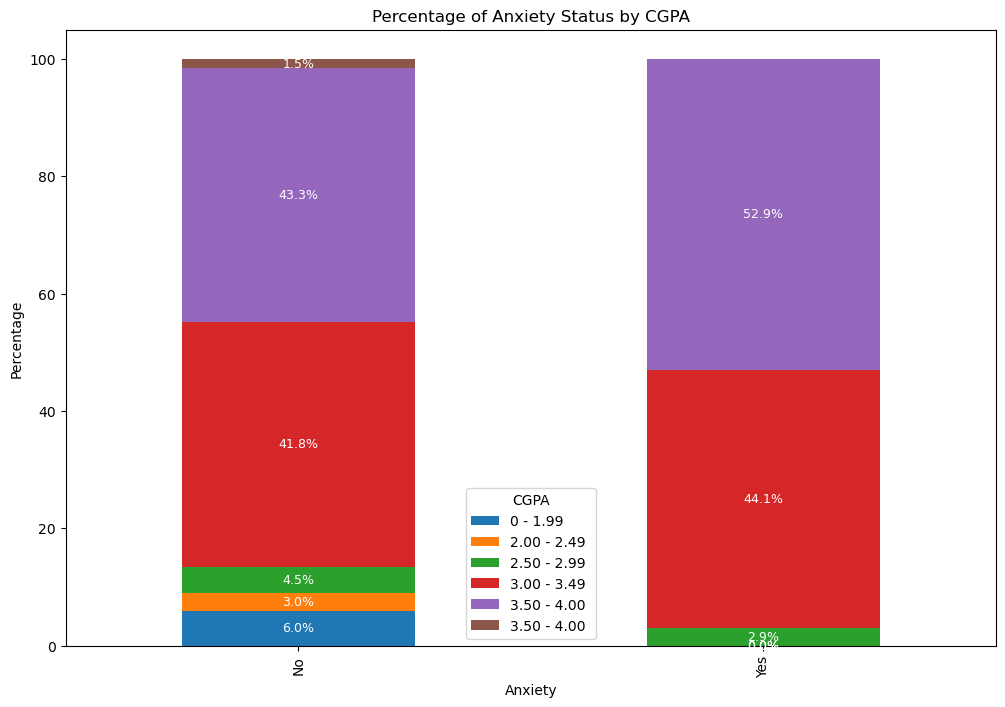

In [50]:
grouped = df.groupby("Anxiety")["CGPA"].value_counts(normalize=True) * 100
grouped = grouped.unstack()


ax = grouped.plot(kind='bar', stacked=True, figsize = (12, 8))

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=9, color='white')


ax.set_xlabel("Anxiety")
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Anxiety Status by CGPA')
ax.legend(title="CGPA")
# 시각화 

print()

In [53]:
# A New Perspective for Depression, Anxiety, Panic Attack
# 우울증, 불안, 공황 발작에 대한 새로운 관점 
# 새로운 dataframe

df_new = df[["Depression", "Anxiety", "Panic attack", "Treatment"]]


In [55]:
df_new.groupby("Treatment")["Depression"].value_counts() 
# Depression 치료 
# 특정 치료를 받은 사람들 중 얼마나 많은 사람들이 우울증이 있는지 없는지 파악

Treatment  Depression
No         No            66
           Yes           29
Yes        Yes            6
Name: count, dtype: int64

In [58]:
df_new.groupby("Treatment")["Anxiety"].value_counts()
# 치료 방법에 따른 불안상태 빈도수  

Treatment  Anxiety
No         No         64
           Yes        31
Yes        No          3
           Yes         3
Name: count, dtype: int64

In [59]:
df_new.groupby("Treatment")["Panic attack"].value_counts()
# 치료 방법에 따른 공항 발작 빈도수 

Treatment  Panic attack
No         No              66
           Yes             29
Yes        Yes              4
           No               2
Name: count, dtype: int64

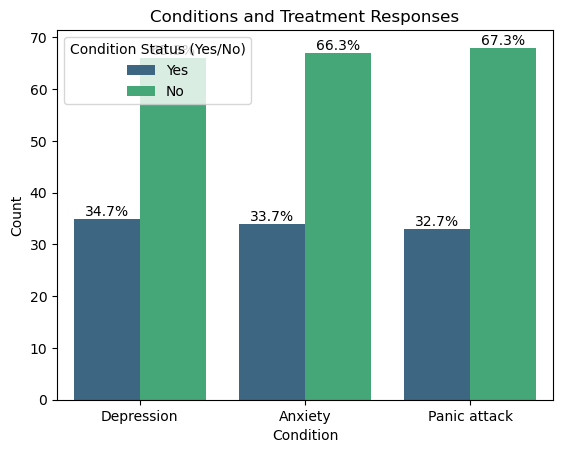

In [60]:
df_long = df_new.melt(id_vars='Treatment', var_name='Condition', value_name='Condition_Status')

ax = sns.countplot(data=df_long, x='Condition', hue='Condition_Status', palette='viridis', dodge=True)
ax.set_title('Conditions and Treatment Responses')
ax.set_xlabel('Condition')
ax.set_ylabel('Count')
ax.legend(title='Condition Status (Yes/No)')


total_counts = df_long.groupby(['Condition', 'Condition_Status']).size().unstack().sum(axis=1)

for p in ax.patches:
    condition = p.get_x() + p.get_width() / 2.0 
    height = p.get_height()
    condition_label = ax.get_xticklabels()[int(p.get_x() + p.get_width() / 2)].get_text()   # 위치에 해당하는 레이블을 가져옴
    total = total_counts[condition_label]  # 총 계수 
    percentage = f'{height / total * 100:.1f}%' # 백 분율 계산 
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom') # 백분율을 해당 막대 위에 표시 

print()
# 정황 and 치료에 대한 응답률 

In [61]:
def convert_range_to_midpoint(cgpa_range): # 범위 중간값으로 변환하여 새로운 열 추가 
    lower, upper = map(float, cgpa_range.split(' - '))
    return(lower + upper) / 2
df['CGPA_Updated'] = df['CGPA'].apply(convert_range_to_midpoint) 

In [62]:
plt = px.histogram(df, x='CGPA_Updated', color='Depression', barmode='group', title='CGPA and Depression Distribution')
plt.show()

plt = px.histogram(df, x='CGPA_Updated', color='Anxiety', barmode='group', title='CGPA and Anxiety Distribution')
plt.show()

plt = px.histogram(df, x='CGPA_Updated', color='Panic attack', barmode='group', title='CGPA and Panic Attack Distribution')
plt.show()

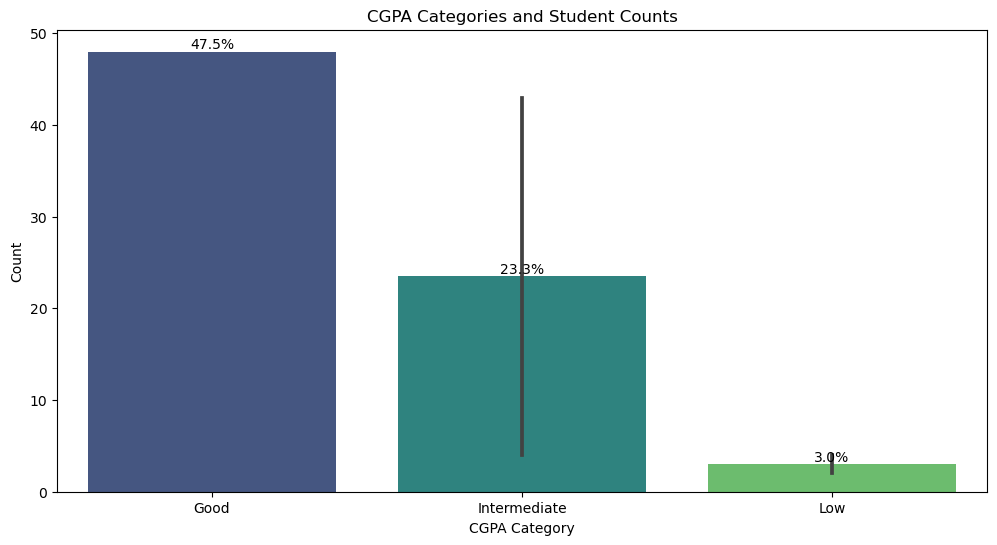

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt 

data = {
    "CGPA": ["3.50 - 4.00", "3.00 - 3.49", "2.50 - 2.99", "0 - 1.99", "2.00 - 2.49"],
    "Count": [48, 43, 4, 4, 2]
}
# cgpa --> count dataframe 
df = pd.DataFrame(data)

# cgpa 중앙값으로 변환 
def convert_range_to_midpoint(cgpa_range):
    lower, upper = map(float, cgpa_range.split('-'))
    return(lower + upper) / 2

# cgpa 중앙값을 변환하여 새로운 열을 추가한다.
# 새로운 열: CGPA_Category 생성 
df['CGPA_Updated'] = df['CGPA'].apply(convert_range_to_midpoint) 

def classify_cgpa(midpoint):
    if midpoint >= 0 and midpoint <= 2.49:
        return 'Low'
    elif midpoint >= 2.50 and midpoint <= 3.49:
        return 'Intermediate'
    elif midpoint >= 3.50 and midpoint <= 4.00:
        return 'Good'
    else:
        return 'Unknown'
    
df['CGPA_Category'] = df['CGPA_Updated'].apply(classify_cgpa)

# dataframe 긴열로 변환 
# melt: 데이터프레임을 넣은 형태에서 긴형테로 변환
df_long = df.melt(id_vars=['CGPA', 'Count', 'CGPA_Updated', 'CGPA_Category'], var_name='Variable', value_name='Value')

# 중앙값을 변환한 CGPA_category and stucents counts에 대한 시각화 
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='CGPA_Category', y='Count', data=df, palette='viridis')
plt.title('CGPA Categories and Student Counts')
plt.xlabel('CGPA Category')
plt.ylabel('Count')

total_counts = df['Count'].sum()

for p in ax.patches:
    height = p.get_height()
    percentage = f'{height / total_counts * 100:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.show()
